# FOXSI3 data on top of AIA
## Preliminary images
### October 2018
#### Milo BC, UC Berkeley

I assume we launched on time, i.e. at 17:21UT on Sept 7, 2018.<br/>
Observations started 110 seconds after launched.<br/><br/>
Target exposure time: <br/>
1 (AR): 120 seconds<br/>
2 (NP): 30 seconds<br/>
3 (QS): 150 seconds<br/>
4 (AR): 60 seconds

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import sunpy.map
import astropy.units as u
import astropy.io.fits as pyfits
from matplotlib.colors import LinearSegmentedColormap, LogNorm 
from datetime import datetime

## Defining transparent colors

In [2]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

tblue = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

txray = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
tblue = LinearSegmentedColormap('tblue', tblue) 
txray = LinearSegmentedColormap('txray', txray) 

## FOXSI Time

In [3]:
TFOXSI = datetime(2018,9,7,11,21)
# Dir path:
dir_path = '/Volumes/Pandora/FOXSI/AIA-FOXSI3/'

## Target-1 [AR]

#### Preliminary FOXSI3 images

In [21]:
fits_path = '/Users/Kamilobu/Desktop/Map2Fits/'
T1D0 = pyfits.open(fits_path+'T1D0.fits')
T1D2 = pyfits.open(fits_path+'T1D2.fits')
T1D4 = pyfits.open(fits_path+'T1D4.fits')
T1D6 = pyfits.open(fits_path+'T1D6.fits')
T1D3 = pyfits.open(fits_path+'T1D3.fits')
T1D5 = pyfits.open(fits_path+'T1D5.fits')

In [5]:
Ftarget = {'cen1_pos0':(429.9,  39.5), ## arcsec
           'cen2_pos0':( -0.1, 650.7),
           'cen3_pos0':(-650.8,  39.6),
           'cen4_pos0':(429.8,  39.6),
           'cen4_pos1':(550.8,  39.6)}
fov = {'Si':990*0.5,'CdTe':792*0.5} ## arcsec
ang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles

In [6]:
file094T1m = dir_path+'aia.lev1_euv_12s.2018-09-07T172349Z.94.image_lev1.fits'
file171T1m = dir_path+'aia.lev1_euv_12s.2018-09-07T172346Z.171.image_lev1.fits'
file211T1m = dir_path+'aia.lev1_euv_12s.2018-09-07T172347Z.211.image_lev1.fits'

T1m094 = sunpy.map.Map(file094T1m)
T1m171 = sunpy.map.Map(file171T1m)
T1m211 = sunpy.map.Map(file211T1m)
TempMapT1m = sunpy.map.Map(file171T1m)
TempMapT1m.data[:] = T1m211.data[:]/-120 + T1m171.data[:]/-450

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-604.0, 683.0)

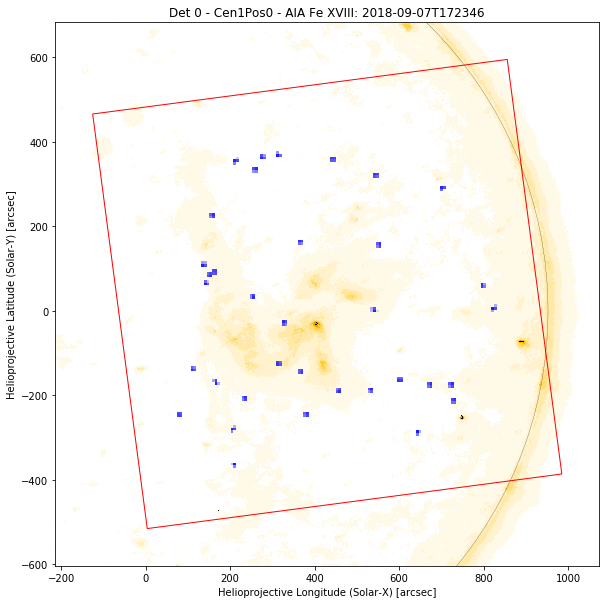

In [55]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT1m.plot(vmin=-8,title='Det 0 - Cen1Pos0 - AIA Fe XVIII: 2018-09-07T172346')
TempMapT1m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T1D0[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen1_pos0'][0]-fov['Si'],
                  Ftarget['cen1_pos0'][0]+fov['Si'],
                  Ftarget['cen1_pos0'][1]-fov['Si'],
                  Ftarget['cen1_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen1_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 2

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-604.0, 683.0)

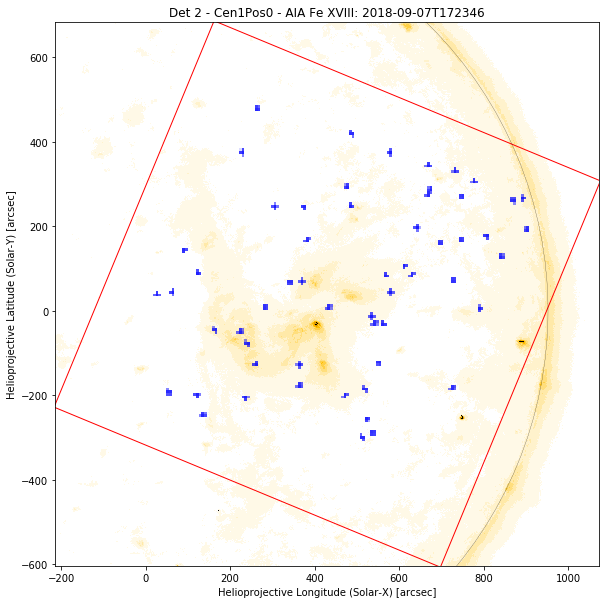

In [56]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT1m.plot(vmin=-8,title='Det 2 - Cen1Pos0 - AIA Fe XVIII: 2018-09-07T172346')
TempMapT1m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T1D2[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen1_pos0'][0]-fov['Si'],
                  Ftarget['cen1_pos0'][0]+fov['Si'],
                  Ftarget['cen1_pos0'][1]-fov['Si'],
                  Ftarget['cen1_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen1_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 4

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-604.0, 683.0)

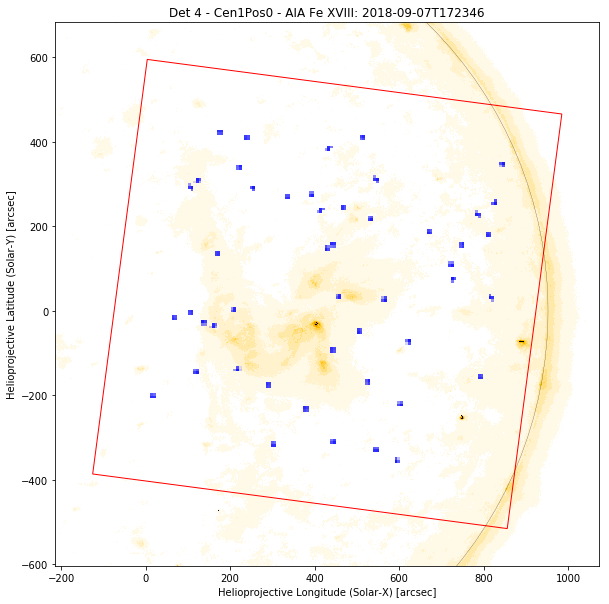

In [57]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT1m.plot(vmin=-8,title='Det 4 - Cen1Pos0 - AIA Fe XVIII: 2018-09-07T172346')
TempMapT1m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T1D4[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen1_pos0'][0]-fov['Si'],
                  Ftarget['cen1_pos0'][0]+fov['Si'],
                  Ftarget['cen1_pos0'][1]-fov['Si'],
                  Ftarget['cen1_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen1_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 6

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-604.0, 683.0)

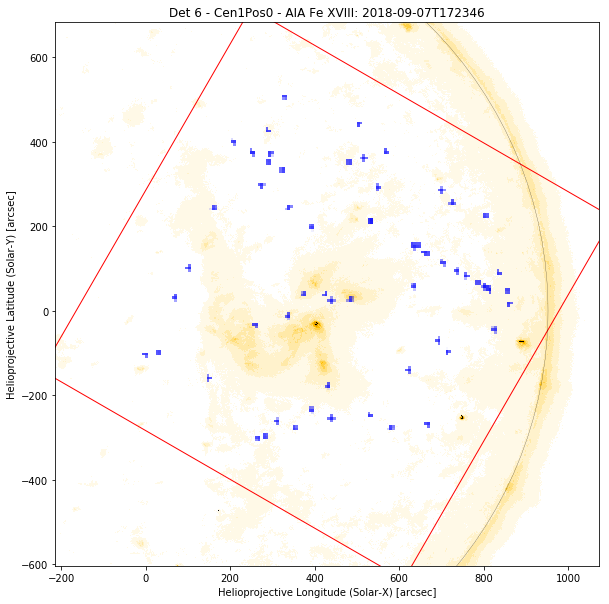

In [58]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT1m.plot(vmin=-8,title='Det 6 - Cen1Pos0 - AIA Fe XVIII: 2018-09-07T172346')
TempMapT1m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T1D6[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen1_pos0'][0]-fov['Si'],
                  Ftarget['cen1_pos0'][0]+fov['Si'],
                  Ftarget['cen1_pos0'][1]-fov['Si'],
                  Ftarget['cen1_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen1_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 3

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-475.30000000000007, 554.3000000000001)

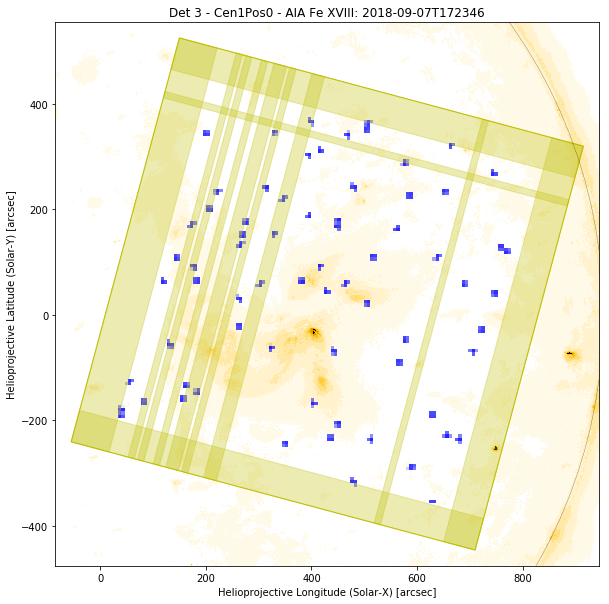

In [59]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT1m.plot(vmin=-8,title='Det 3 - Cen1Pos0 - AIA Fe XVIII: 2018-09-07T172346')
TempMapT1m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T1D3[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen1_pos0'][0]-fov['CdTe'],
                  Ftarget['cen1_pos0'][0]+fov['CdTe'],
                  Ftarget['cen1_pos0'][1]-fov['CdTe'],
                  Ftarget['cen1_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen1_pos0']
## Pos3 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,674.5,730.2]
ldx = [61.9,12.4,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[3]))
    dy = d * np.sin(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,185.6,507.4,563.1,581.7,618.8,649.7,668.3,717.8]
ldy = [61.9,12.4,24.8,12.4,24.7,12.4,12.4,12.4,74.3]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[3]))
    dy = d * np.cos(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)  


scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-475.30000000000007, 554.3000000000001)

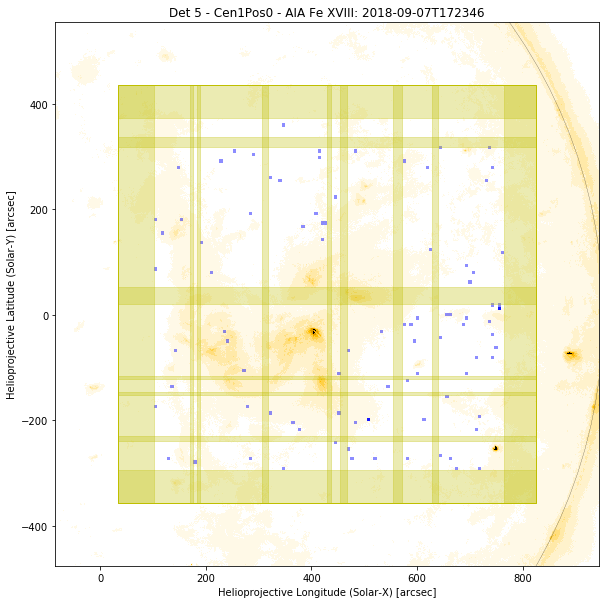

In [101]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT1m.plot(vmin=-8,title='Det 5 - Cen1Pos0 - AIA Fe XVIII: 2018-09-07T172346')
TempMapT1m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T1D5[0].data,origin='lower',cmap=tblue,
          extent=[Ftarget['cen1_pos0'][0]-fov['CdTe'],
                  Ftarget['cen1_pos0'][0]+fov['CdTe'],
                  Ftarget['cen1_pos0'][1]-fov['CdTe'],
                  Ftarget['cen1_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen1_pos0']
## Pos5 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,99,383.6,550.7,581.7,665.9,730.2]
ldx = [61.9,18.6,31,6.2,6.2,8.6,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[5]))
    dy = d * np.sin(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,136.1,148.5,272.3,396,420.8,519.8,594,730.2]
ldy = [68.1,6.2,6.2,12.3,6.2,12.4,18.5,12.4,62]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[5]))
    dy = d * np.cos(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)

scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

# Target-2 [NP]

In [70]:
fits_path = '/Users/Kamilobu/Desktop/Map2Fits/'
T2D0 = pyfits.open(fits_path+'T2D0.fits')
T2D2 = pyfits.open(fits_path+'T2D2.fits')
T2D4 = pyfits.open(fits_path+'T2D4.fits')
T2D6 = pyfits.open(fits_path+'T2D6.fits')
T2D3 = pyfits.open(fits_path+'T2D3.fits')
T2D5 = pyfits.open(fits_path+'T2D5.fits')

In [71]:
file094T2m = dir_path+'aia.lev1_euv_12s.2018-09-07T172537Z.94.image_lev1.fits'
file171T2m = dir_path+'aia.lev1_euv_12s.2018-09-07T172534Z.171.image_lev1.fits'
file211T2m = dir_path+'aia.lev1_euv_12s.2018-09-07T172535Z.211.image_lev1.fits'

T2m094 = sunpy.map.Map(file094T2m)
T2m171 = sunpy.map.Map(file171T2m)
T2m211 = sunpy.map.Map(file211T2m)
TempMapT2m = sunpy.map.Map(file171T2m)
TempMapT2m.data[:] = T2m211.data[:]/-120 + T2m171.data[:]/-450

## Dect 0

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(7.2000000000000455, 1294.2)

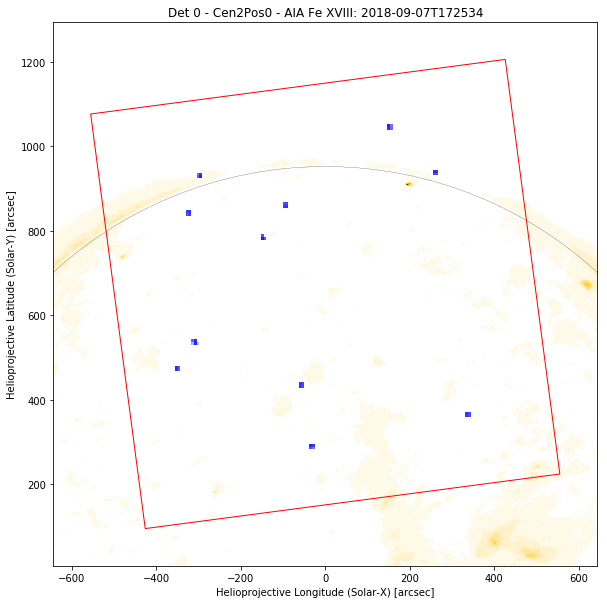

In [72]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT2m.plot(vmin=-8,title='Det 0 - Cen2Pos0 - AIA Fe XVIII: 2018-09-07T172534')
TempMapT2m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T2D0[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen2_pos0'][0]-fov['Si'],
                  Ftarget['cen2_pos0'][0]+fov['Si'],
                  Ftarget['cen2_pos0'][1]-fov['Si'],
                  Ftarget['cen2_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen2_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 2

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(7.2000000000000455, 1294.2)

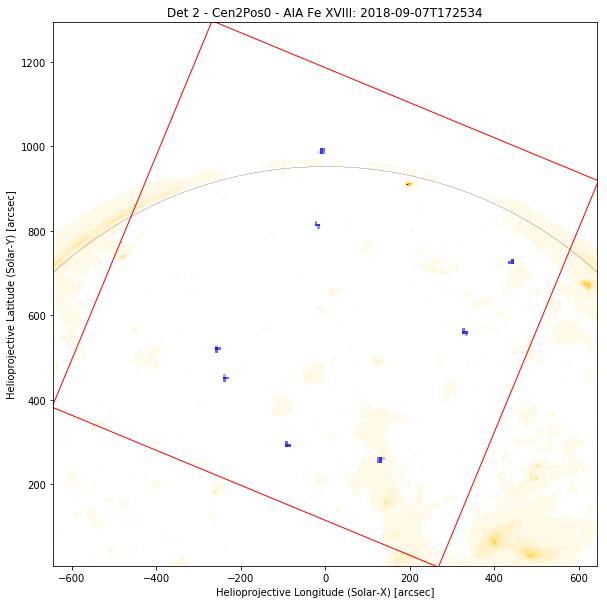

In [73]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT2m.plot(vmin=-8,title='Det 2 - Cen2Pos0 - AIA Fe XVIII: 2018-09-07T172534')
TempMapT2m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T2D2[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen2_pos0'][0]-fov['Si'],
                  Ftarget['cen2_pos0'][0]+fov['Si'],
                  Ftarget['cen2_pos0'][1]-fov['Si'],
                  Ftarget['cen2_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen2_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 4

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(7.2000000000000455, 1294.2)

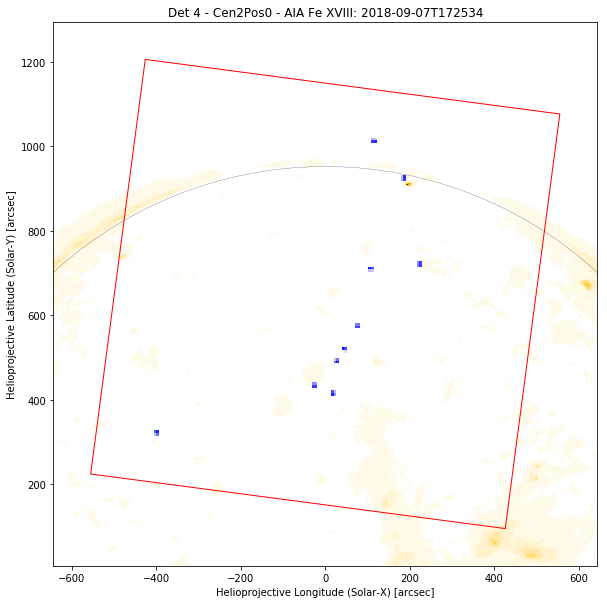

In [74]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT2m.plot(vmin=-8,title='Det 4 - Cen2Pos0 - AIA Fe XVIII: 2018-09-07T172534')
TempMapT2m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T2D4[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen2_pos0'][0]-fov['Si'],
                  Ftarget['cen2_pos0'][0]+fov['Si'],
                  Ftarget['cen2_pos0'][1]-fov['Si'],
                  Ftarget['cen2_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen2_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 6

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(7.2000000000000455, 1294.2)

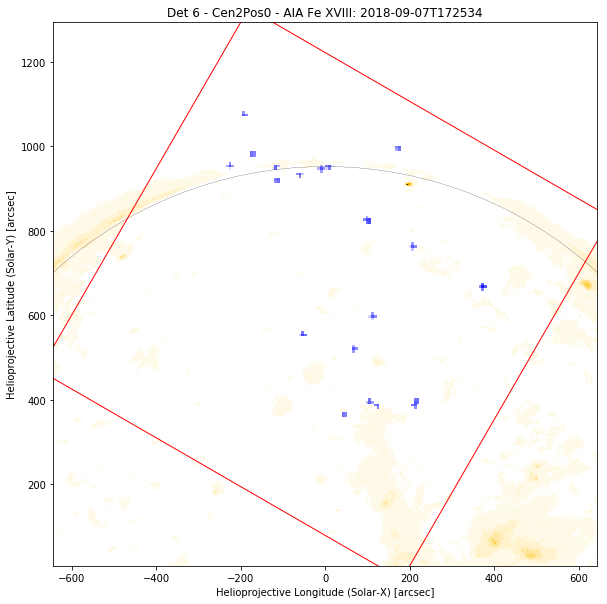

In [75]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT2m.plot(vmin=-8,title='Det 6 - Cen2Pos0 - AIA Fe XVIII: 2018-09-07T172534')
TempMapT2m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T2D6[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen2_pos0'][0]-fov['Si'],
                  Ftarget['cen2_pos0'][0]+fov['Si'],
                  Ftarget['cen2_pos0'][1]-fov['Si'],
                  Ftarget['cen2_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen2_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 3

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(135.89999999999998, 1165.5)

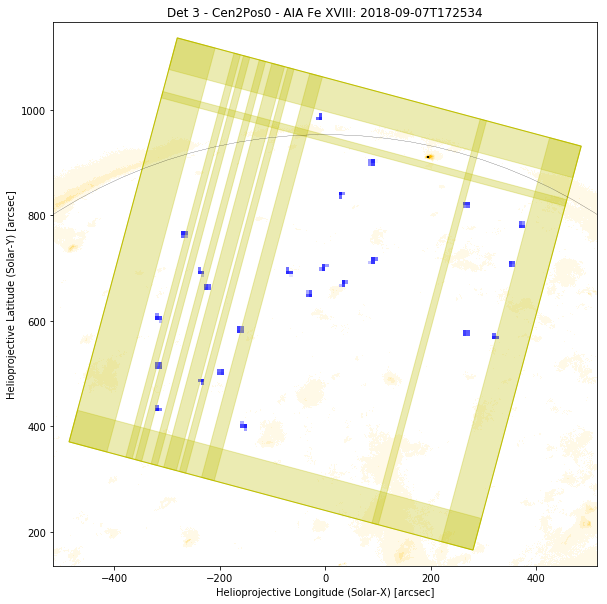

In [102]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT2m.plot(vmin=-8,title='Det 3 - Cen2Pos0 - AIA Fe XVIII: 2018-09-07T172534')
TempMapT2m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T2D3[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen2_pos0'][0]-fov['CdTe'],
                  Ftarget['cen2_pos0'][0]+fov['CdTe'],
                  Ftarget['cen2_pos0'][1]-fov['CdTe'],
                  Ftarget['cen2_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen2_pos0']
## Pos3 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,674.5,730.2]
ldx = [61.9,12.4,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[3]))
    dy = d * np.sin(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,185.6,507.4,563.1,581.7,618.8,649.7,668.3,717.8]
ldy = [61.9,12.4,24.8,12.4,24.7,12.4,12.4,12.4,74.3]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[3]))
    dy = d * np.cos(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)  


scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(135.89999999999998, 1165.5)

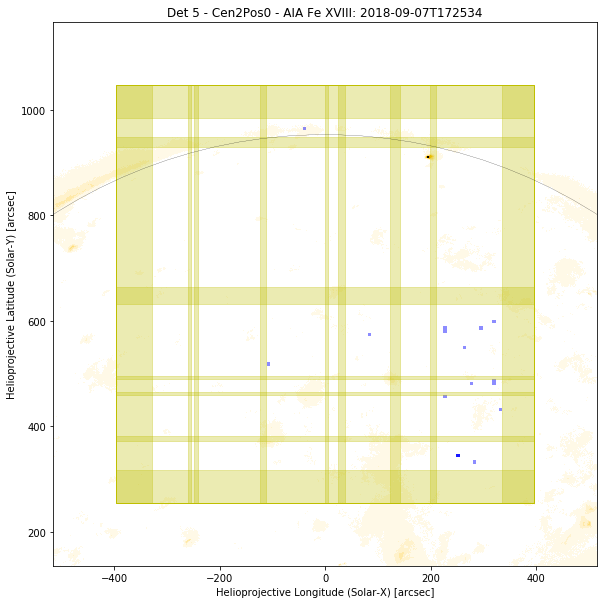

In [103]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT2m.plot(vmin=-8,title='Det 5 - Cen2Pos0 - AIA Fe XVIII: 2018-09-07T172534')
TempMapT2m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T2D5[0].data,origin='lower',cmap=tblue,
          extent=[Ftarget['cen2_pos0'][0]-fov['CdTe'],
                  Ftarget['cen2_pos0'][0]+fov['CdTe'],
                  Ftarget['cen2_pos0'][1]-fov['CdTe'],
                  Ftarget['cen2_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen2_pos0']
## Pos5 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,99,383.6,550.7,581.7,665.9,730.2]
ldx = [61.9,18.6,31,6.2,6.2,8.6,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[5]))
    dy = d * np.sin(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,136.1,148.5,272.3,396,420.8,519.8,594,730.2]
ldy = [68.1,6.2,6.2,12.3,6.2,12.4,18.5,12.4,62]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[5]))
    dy = d * np.cos(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)

scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

# Target-3 [QS]

In [80]:
fits_path = '/Users/Kamilobu/Desktop/Map2Fits/'
T3D0 = pyfits.open(fits_path+'T3D0.fits')
T3D2 = pyfits.open(fits_path+'T3D2.fits')
T3D4 = pyfits.open(fits_path+'T3D4.fits')
T3D6 = pyfits.open(fits_path+'T3D6.fits')
T3D3 = pyfits.open(fits_path+'T3D3.fits')
T3D5 = pyfits.open(fits_path+'T3D5.fits')

In [81]:
file094T3m = dir_path+'aia.lev1_euv_12s.2018-09-07T172637Z.94.image_lev1.fits'
file171T3m = dir_path+'aia.lev1_euv_12s.2018-09-07T172634Z.171.image_lev1.fits'
file211T3m = dir_path+'aia.lev1_euv_12s.2018-09-07T172635Z.211.image_lev1.fits'

T3m094 = sunpy.map.Map(file094T3m)
T3m171 = sunpy.map.Map(file171T3m)
T3m211 = sunpy.map.Map(file211T3m)
TempMapT3m = sunpy.map.Map(file171T3m)
TempMapT3m.data[:] = T3m211.data[:]/-120 + T3m171.data[:]/-450

## Dect 0

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

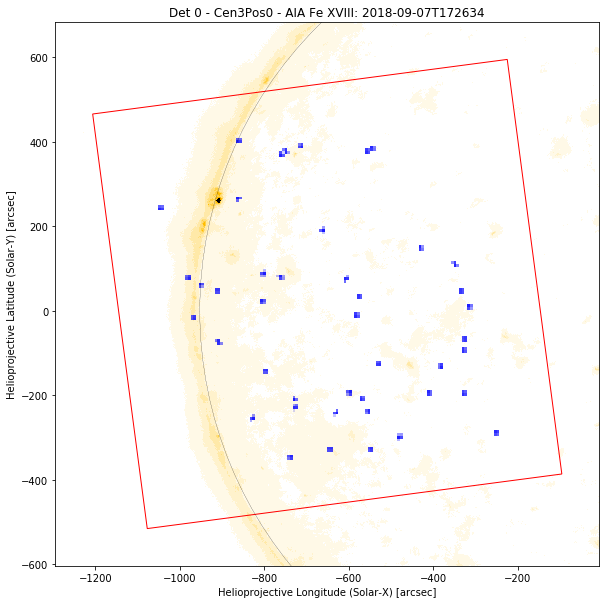

In [86]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT3m.plot(vmin=-8,title='Det 0 - Cen3Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT3m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T3D0[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen3_pos0'][0]-fov['Si'],
                  Ftarget['cen3_pos0'][0]+fov['Si'],
                  Ftarget['cen3_pos0'][1]-fov['Si'],
                  Ftarget['cen3_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen3_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 2

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

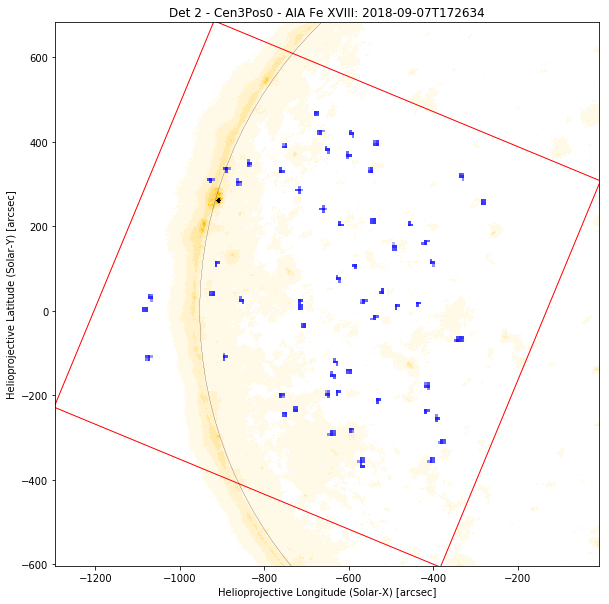

In [87]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT3m.plot(vmin=-8,title='Det 2 - Cen3Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT3m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T3D2[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen3_pos0'][0]-fov['Si'],
                  Ftarget['cen3_pos0'][0]+fov['Si'],
                  Ftarget['cen3_pos0'][1]-fov['Si'],
                  Ftarget['cen3_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen3_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 4

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

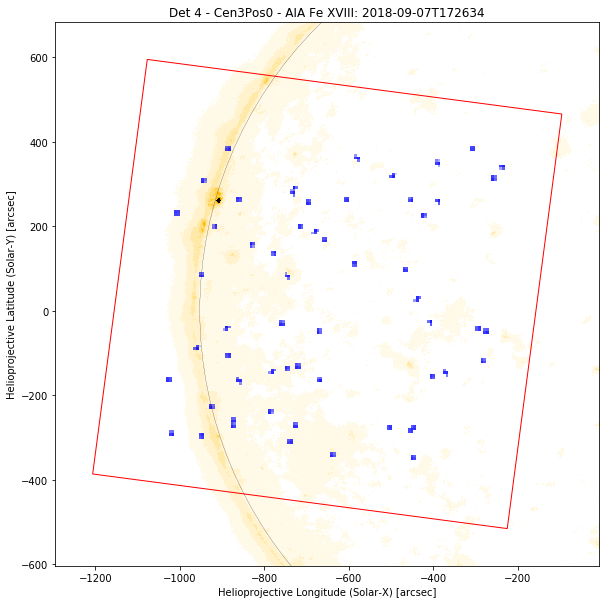

In [88]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT3m.plot(vmin=-8,title='Det 4 - Cen3Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT3m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T3D4[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen3_pos0'][0]-fov['Si'],
                  Ftarget['cen3_pos0'][0]+fov['Si'],
                  Ftarget['cen3_pos0'][1]-fov['Si'],
                  Ftarget['cen3_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen3_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 6

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

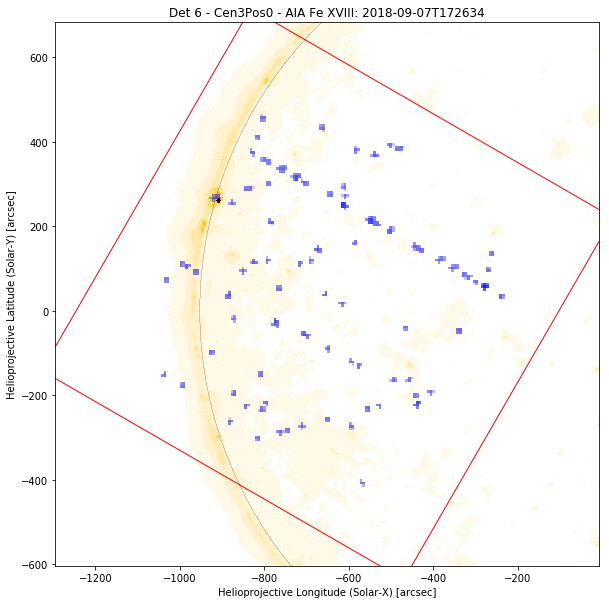

In [89]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT3m.plot(vmin=-8,title='Det 6 - Cen3Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT3m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T3D6[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen3_pos0'][0]-fov['Si'],
                  Ftarget['cen3_pos0'][0]+fov['Si'],
                  Ftarget['cen3_pos0'][1]-fov['Si'],
                  Ftarget['cen3_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen3_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 3

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-475.20000000000005, 554.4000000000001)

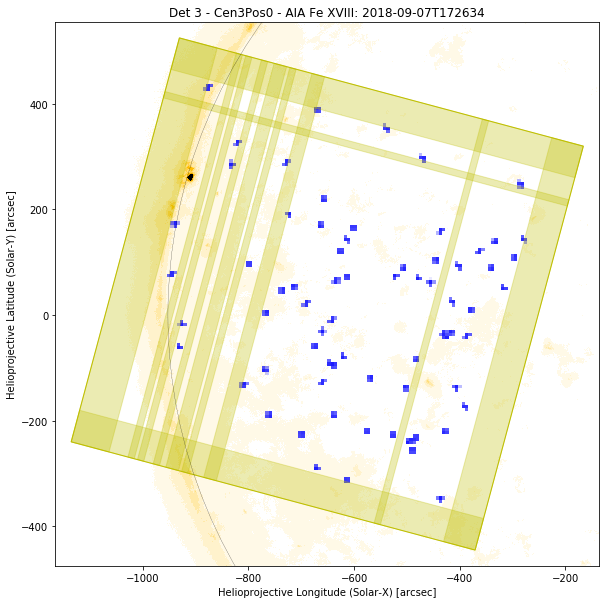

In [98]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT3m.plot(vmin=-8,title='Det 3 - Cen3Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT3m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T3D3[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen3_pos0'][0]-fov['CdTe'],
                  Ftarget['cen3_pos0'][0]+fov['CdTe'],
                  Ftarget['cen3_pos0'][1]-fov['CdTe'],
                  Ftarget['cen3_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen3_pos0']
## Pos3 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,674.5,730.2]
ldx = [61.9,12.4,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[3]))
    dy = d * np.sin(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,185.6,507.4,563.1,581.7,618.8,649.7,668.3,717.8]
ldy = [61.9,12.4,24.8,12.4,24.7,12.4,12.4,12.4,74.3]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[3]))
    dy = d * np.cos(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)  


scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

## Dect 6

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-475.20000000000005, 554.4000000000001)

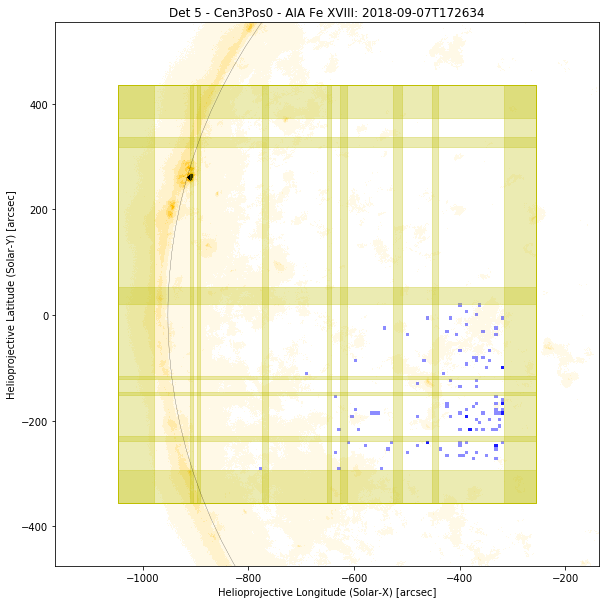

In [99]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT3m.plot(vmin=-8,title='Det 5 - Cen3Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT3m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T3D5[0].data,origin='lower',cmap=tblue,
          extent=[Ftarget['cen3_pos0'][0]-fov['CdTe'],
                  Ftarget['cen3_pos0'][0]+fov['CdTe'],
                  Ftarget['cen3_pos0'][1]-fov['CdTe'],
                  Ftarget['cen3_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen3_pos0']
## Pos5 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,99,383.6,550.7,581.7,665.9,730.2]
ldx = [61.9,18.6,31,6.2,6.2,8.6,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[5]))
    dy = d * np.sin(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,136.1,148.5,272.3,396,420.8,519.8,594,730.2]
ldy = [68.1,6.2,6.2,12.3,6.2,12.4,18.5,12.4,62]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[5]))
    dy = d * np.cos(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)

scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

# Target-4 [AR] - Pos0

In [100]:
fits_path = '/Users/Kamilobu/Desktop/Map2Fits/'
T40D0 = pyfits.open(fits_path+'T40D0.fits')
T40D2 = pyfits.open(fits_path+'T40D2.fits')
T40D4 = pyfits.open(fits_path+'T40D4.fits')
T40D6 = pyfits.open(fits_path+'T40D6.fits')
T40D3 = pyfits.open(fits_path+'T40D3.fits')
T40D5 = pyfits.open(fits_path+'T40D5.fits')

In [104]:
file094T40m = dir_path+'aia.lev1_euv_12s.2018-09-07T172813Z.94.image_lev1.fits'
file171T40m = dir_path+'aia.lev1_euv_12s.2018-09-07T172810Z.171.image_lev1.fits'
file211T40m = dir_path+'aia.lev1_euv_12s.2018-09-07T172811Z.211.image_lev1.fits'

T40m094 = sunpy.map.Map(file094T40m)
T40m171 = sunpy.map.Map(file171T40m)
T40m211 = sunpy.map.Map(file211T40m)
TempMapT40m = sunpy.map.Map(file171T40m)
TempMapT40m.data[:] = T40m211.data[:]/-120 + T40m171.data[:]/-450

## Dect 0

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

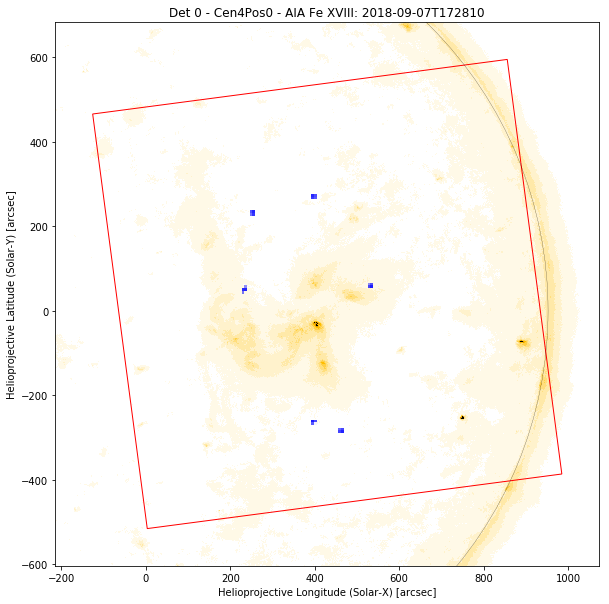

In [106]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT40m.plot(vmin=-8,title='Det 0 - Cen4Pos0 - AIA Fe XVIII: 2018-09-07T172810')
TempMapT40m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T40D0[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos0'][0]-fov['Si'],
                  Ftarget['cen4_pos0'][0]+fov['Si'],
                  Ftarget['cen4_pos0'][1]-fov['Si'],
                  Ftarget['cen4_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 2

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

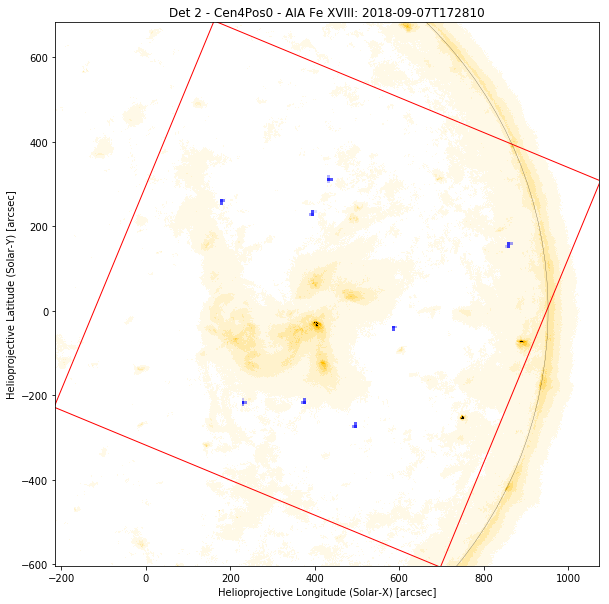

In [108]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT40m.plot(vmin=-8,title='Det 2 - Cen4Pos0 - AIA Fe XVIII: 2018-09-07T172810')
TempMapT40m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T40D2[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos0'][0]-fov['Si'],
                  Ftarget['cen4_pos0'][0]+fov['Si'],
                  Ftarget['cen4_pos0'][1]-fov['Si'],
                  Ftarget['cen4_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 4

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

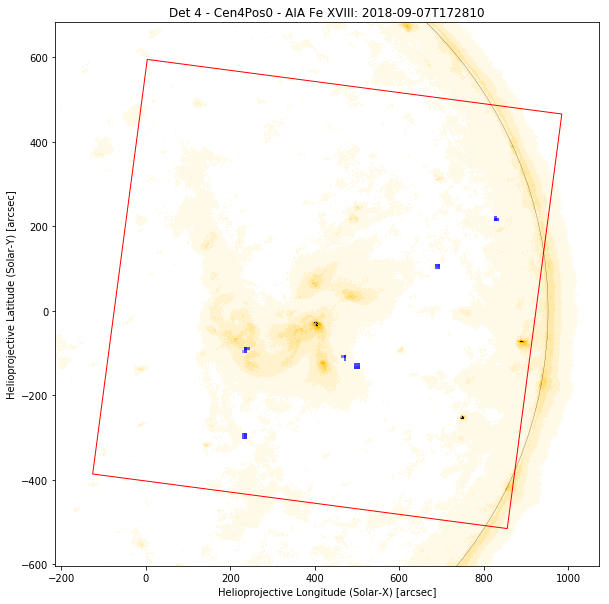

In [109]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT40m.plot(vmin=-8,title='Det 4 - Cen4Pos0 - AIA Fe XVIII: 2018-09-07T172810')
TempMapT40m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T40D4[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos0'][0]-fov['Si'],
                  Ftarget['cen4_pos0'][0]+fov['Si'],
                  Ftarget['cen4_pos0'][1]-fov['Si'],
                  Ftarget['cen4_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 6

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

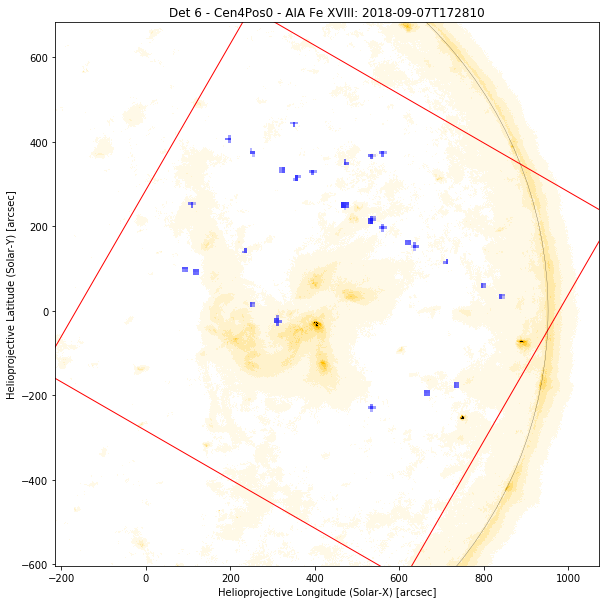

In [110]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT40m.plot(vmin=-8,title='Det 6 - Cen4Pos0 - AIA Fe XVIII: 2018-09-07T172810')
TempMapT40m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T40D6[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos0'][0]-fov['Si'],
                  Ftarget['cen4_pos0'][0]+fov['Si'],
                  Ftarget['cen4_pos0'][1]-fov['Si'],
                  Ftarget['cen4_pos0'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos0']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-475.20000000000005, 554.4000000000001)

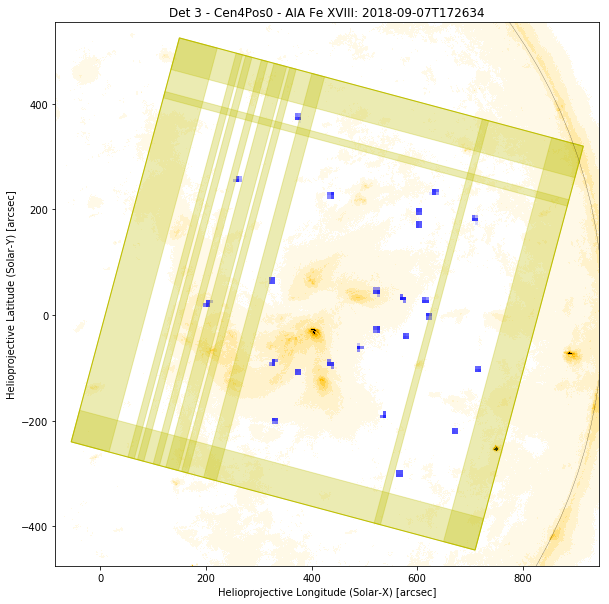

In [111]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT40m.plot(vmin=-8,title='Det 3 - Cen4Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT40m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T40D3[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos0'][0]-fov['CdTe'],
                  Ftarget['cen4_pos0'][0]+fov['CdTe'],
                  Ftarget['cen4_pos0'][1]-fov['CdTe'],
                  Ftarget['cen4_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen4_pos0']
## Pos3 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,674.5,730.2]
ldx = [61.9,12.4,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[3]))
    dy = d * np.sin(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,185.6,507.4,563.1,581.7,618.8,649.7,668.3,717.8]
ldy = [61.9,12.4,24.8,12.4,24.7,12.4,12.4,12.4,74.3]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[3]))
    dy = d * np.cos(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)  


scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-475.20000000000005, 554.4000000000001)

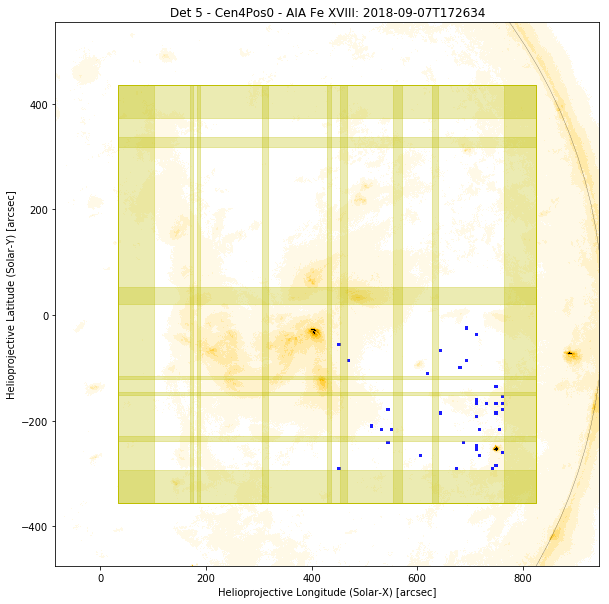

In [112]:
fig, ax = plt.subplots(figsize=(10,10));
#T4f094.plot(vmin=2,title='AIA 94 Target4 AR - 2018-09-07T172849')
#T4f094.draw_limb()
TempMapT40m.plot(vmin=-8,title='Det 5 - Cen4Pos0 - AIA Fe XVIII: 2018-09-07T172634')
TempMapT40m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T40D5[0].data,origin='lower',cmap=tblue,
          extent=[Ftarget['cen4_pos0'][0]-fov['CdTe'],
                  Ftarget['cen4_pos0'][0]+fov['CdTe'],
                  Ftarget['cen4_pos0'][1]-fov['CdTe'],
                  Ftarget['cen4_pos0'][1]+fov['CdTe']])
## Detector FOV:
l = fov['CdTe']
x,y = Ftarget['cen4_pos0']
## Pos5 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,99,383.6,550.7,581.7,665.9,730.2]
ldx = [61.9,18.6,31,6.2,6.2,8.6,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[5]))
    dy = d * np.sin(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,136.1,148.5,272.3,396,420.8,519.8,594,730.2]
ldy = [68.1,6.2,6.2,12.3,6.2,12.4,18.5,12.4,62]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[5]))
    dy = d * np.cos(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)

scale = 1.3
ax.set_xlim(x-fov['CdTe']*scale,x+fov['CdTe']*scale)
ax.set_ylim(y-fov['CdTe']*scale,y+fov['CdTe']*scale)

## Little kick to teh Western limb

In [114]:
fits_path = '/Users/Kamilobu/Desktop/Map2Fits/'
T41D0 = pyfits.open(fits_path+'T41D0.fits')
T41D2 = pyfits.open(fits_path+'T41D2.fits')
T41D4 = pyfits.open(fits_path+'T41D4.fits')
T41D6 = pyfits.open(fits_path+'T41D6.fits')

In [115]:
file094T41m = dir_path+'aia.lev1_euv_12s.2018-09-07T172849Z.94.image_lev1.fits'
file171T41m = dir_path+'aia.lev1_euv_12s.2018-09-07T172846Z.171.image_lev1.fits'
file211T41m = dir_path+'aia.lev1_euv_12s.2018-09-07T172847Z.211.image_lev1.fits'

T41m094 = sunpy.map.Map(file094T40m)
T41m171 = sunpy.map.Map(file171T40m)
T41m211 = sunpy.map.Map(file211T40m)
TempMapT41m = sunpy.map.Map(file171T41m)
TempMapT41m.data[:] = T41m211.data[:]/-120 + T41m171.data[:]/-450

## Dect 0

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

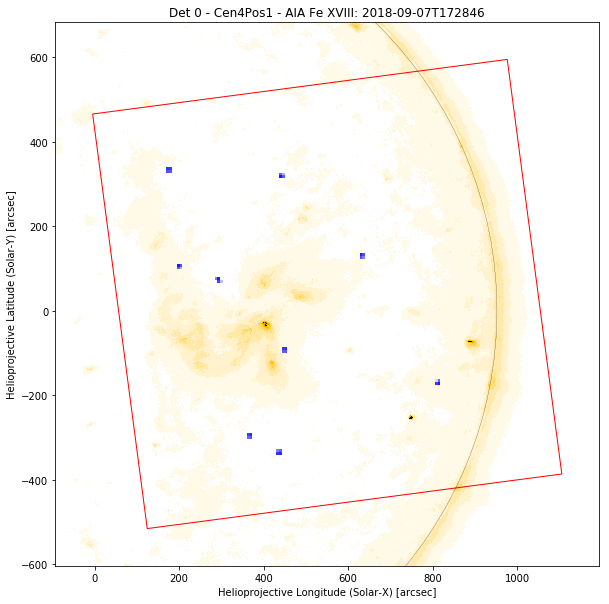

In [117]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT41m.plot(vmin=-8,title='Det 0 - Cen4Pos1 - AIA Fe XVIII: 2018-09-07T172846')
TempMapT41m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T41D0[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos1'][0]-fov['Si'],
                  Ftarget['cen4_pos1'][0]+fov['Si'],
                  Ftarget['cen4_pos1'][1]-fov['Si'],
                  Ftarget['cen4_pos1'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos1']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 2

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

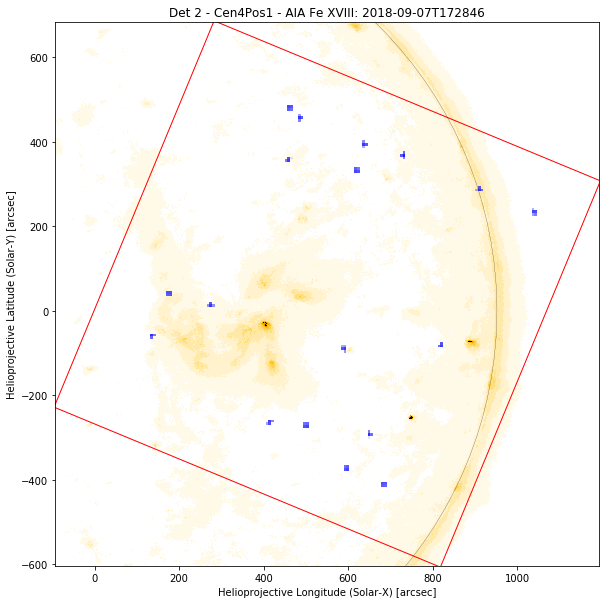

In [123]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT41m.plot(vmin=-8,title='Det 2 - Cen4Pos1 - AIA Fe XVIII: 2018-09-07T172846')
TempMapT41m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T41D2[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos1'][0]-fov['Si'],
                  Ftarget['cen4_pos1'][0]+fov['Si'],
                  Ftarget['cen4_pos1'][1]-fov['Si'],
                  Ftarget['cen4_pos1'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos1']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 4

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

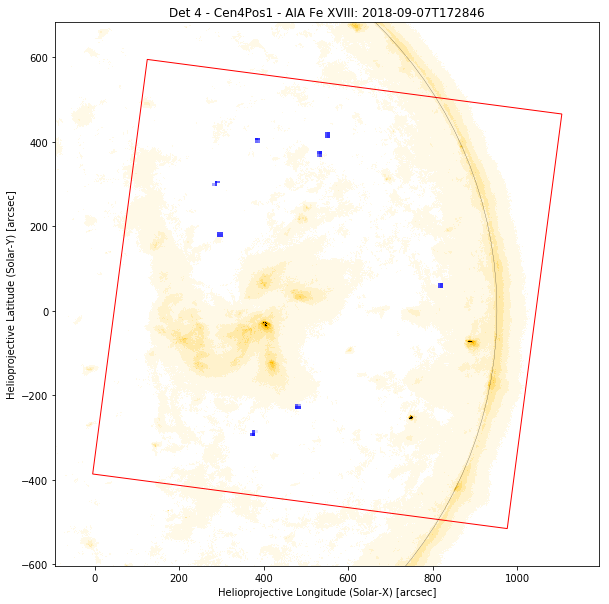

In [121]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT41m.plot(vmin=-8,title='Det 4 - Cen4Pos1 - AIA Fe XVIII: 2018-09-07T172846')
TempMapT41m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T41D4[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos1'][0]-fov['Si'],
                  Ftarget['cen4_pos1'][0]+fov['Si'],
                  Ftarget['cen4_pos1'][1]-fov['Si'],
                  Ftarget['cen4_pos1'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos1']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)

## Dect 6

/Users/Kamilobu/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1736: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


(-603.9, 683.1)

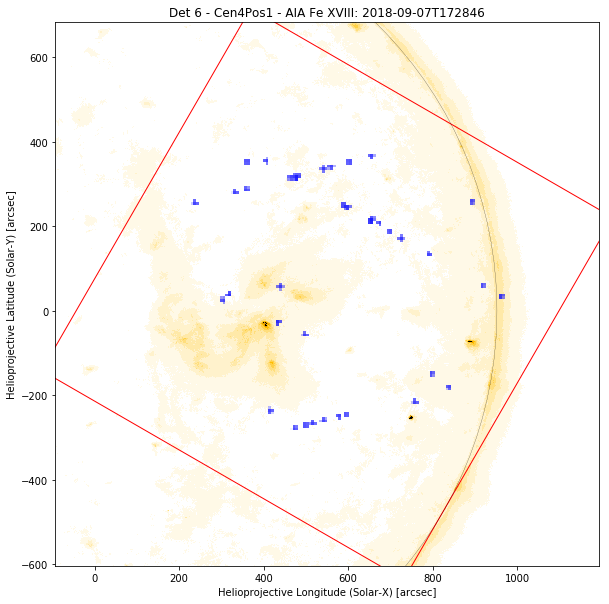

In [122]:
fig, ax = plt.subplots(figsize=(10,10));
TempMapT41m.plot(vmin=-8,title='Det 6 - Cen4Pos1 - AIA Fe XVIII: 2018-09-07T172846')
TempMapT41m.draw_limb(color='black',linewidth=0.2)
## FOXSI3 data:
ax.imshow(T41D6[0].data,origin='lower',cmap=tblue,norm=LogNorm(),
          extent=[Ftarget['cen4_pos1'][0]-fov['Si'],
                  Ftarget['cen4_pos1'][0]+fov['Si'],
                  Ftarget['cen4_pos1'][1]-fov['Si'],
                  Ftarget['cen4_pos1'][1]+fov['Si']])
## Detector FOV:
l = fov['Si']
x,y = Ftarget['cen4_pos1']
## Pos0 - Si
mx = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l+mx,y-l+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
scale = 1.3
ax.set_xlim(x-fov['Si']*scale,x+fov['Si']*scale)
ax.set_ylim(y-fov['Si']*scale,y+fov['Si']*scale)